In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/aiffel/data/data/bike-sharing-demand/train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df['datetime'] = pd.to_datetime(df["datetime"])

In [4]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [6]:
df.drop('datetime', axis=1, inplace=True)

<AxesSubplot:xlabel='second', ylabel='count'>

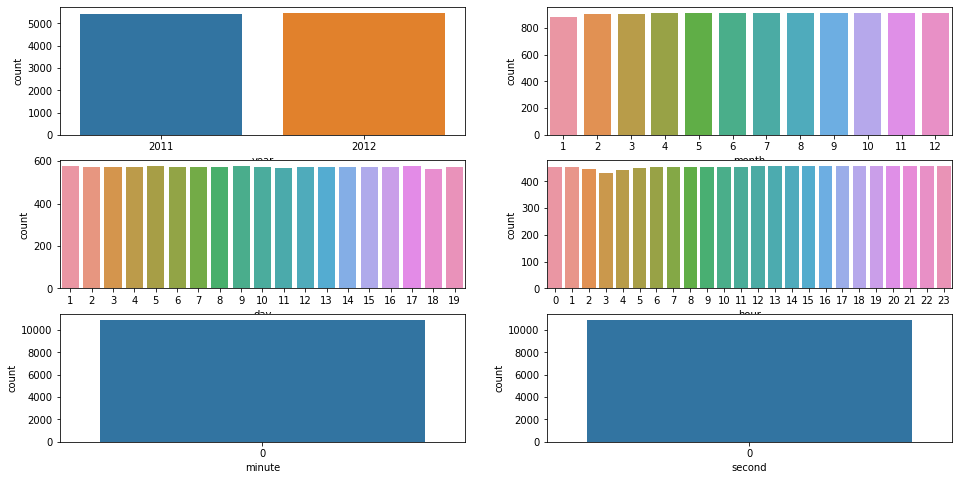

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(16,8))
sns.countplot(ax=axes[0, 0], data=df, x='year')
sns.countplot(ax=axes[0, 1], data=df, x='month')
sns.countplot(ax=axes[1, 0], data=df, x='day')
sns.countplot(ax=axes[1, 1], data=df, x='hour')
sns.countplot(ax=axes[2, 0], data=df, x='minute')
sns.countplot(ax=axes[2, 1], data=df, x='second')

In [8]:
df.drop(['atemp', 'minute', 'second', 'casual', 'registered'], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,75,0.0,1,2011,1,1,4


In [9]:
y = df['count']
X = df.drop(['count'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R^2 is 0.3679722692368832
 Adj R^2 is 0.3647625254518443
 RMSE is: 140.6088932807417


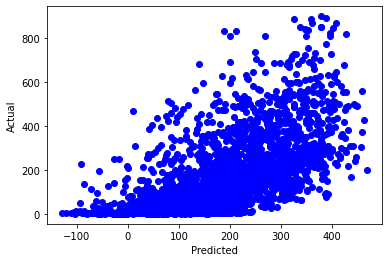

In [15]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
plt.scatter(y_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')